Employee Attrition:: Data Exploration and Prediction


1. Problem Identification
Potential problems that could be analyzed using the dataset:

Identifying factors influencing employee attrition.
Predicting which employees are likely to leave.
Understanding the role of work-life balance, job satisfaction, and environment satisfaction in attrition.
Exploring the impact of education field, job role, and travel requirements on employee retention.


2. Project Objectives
Objective 1: Identify the main factors contributing to employee attrition.
Objective 2: Build a predictive model to identify employees likely to leave the company.


3. Business Questions
Main Business Questions:
- What factors are most strongly correlated with employee attrition?
- How do work-life balance, job satisfaction, and environment satisfaction impact attrition?
- Are demographic factors like age, marital status, or education field predictive of attrition?
- Can we predict which employees are at risk of leaving the company?

Sub-Business Questions:
For each Main Business Question (MBQ):

MBQ 1: What factors are most strongly correlated with employee attrition?

- How do satisfaction scores relate to attrition?
- What roles or departments have the highest attrition rates?
- How does monthly income influence attrition?

MBQ 2: How do work-life balance, job satisfaction, and environment satisfaction impact attrition?

- How does overtime work correlate with satisfaction and attrition?
- Are employees with lower work-life balance more likely to leave?
- How does job involvement relate to employee retention?

MBQ 3: Are demographic factors like age, marital status, or education field predictive of attrition?

- Does marital status influence attrition rates?
- Are employees in specific education fields more likely to leave?
- How does age distribution differ for employees who left vs. stayed?
- Is there a difference in attrition rates between genders?

MBQ 4: Can we predict which employees are at risk of leaving the company?

- What features provide the strongest predictive signal?
- How accurate is the predictive model for attrition?
- Can we identify high-risk employee groups for intervention?
- How does the model handle imbalanced classes in attrition prediction?

Data Analysis Process

4.a. Inspect the Data

Objective:
To understand the dataset's structure and identify relevant variables for answering the business questions.

Columns Involved:

All columns to assess data types, missing values, and overall structure.
Focus on key columns like Attrition, JobSatisfaction, Age, MonthlyIncome, DistanceFromHome, etc.

Why:
This step identifies the variables critical to answering MBQ 1–4. For example, Attrition is the target variable, and its interaction with columns like JobSatisfaction, Age, and MonthlyIncome will help answer key questions.

In [2]:
import pandas as pd
import numpy as np

# Load the dataset

data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Describe the data

data.head()

# Preview data
print(data.head())



   Age CF_age band Attrition     BusinessTravel  DailyRate  \
0   41     35 - 44       Yes      Travel_Rarely       1102   
1   49     44 - 55        No  Travel_Frequently        279   
2   37     35 - 44       Yes      Travel_Rarely       1373   
3   33     25 - 34        No  Travel_Frequently       1392   
4   27     25 - 34        No      Travel_Rarely        591   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales                 1          2  Life Sciences   
1  Research & Development                 8          1  Life Sciences   
2  Research & Development                 2          2          Other   
3  Research & Development                 3          4  Life Sciences   
4  Research & Development                 2          1        Medical   

   EmployeeCount  ...  RelationshipSatisfaction  StandardHours  \
0              1  ...                         1             80   
1              1  ...                         4         

In [3]:
data.dtypes

Age                          int64
CF_age band                 object
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel    

In [4]:
# View data types and missing values
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   CF_age band               1470 non-null   object
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [5]:
# Unique values in categorical columns
categorical_columns = ['Attrition', 'BusinessTravel', 'JobRole', 'MaritalStatus']
for col in categorical_columns:
    print(f"{col} unique values: {data[col].unique()}")

Attrition unique values: ['Yes' 'No']
BusinessTravel unique values: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
JobRole unique values: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus unique values: ['Single' 'Married' 'Divorced']


4.b. Assess data quality

In [6]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Duplicates: {duplicates}")



Duplicates: 0


c. Summarize data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Descriptive statistics
print(data.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

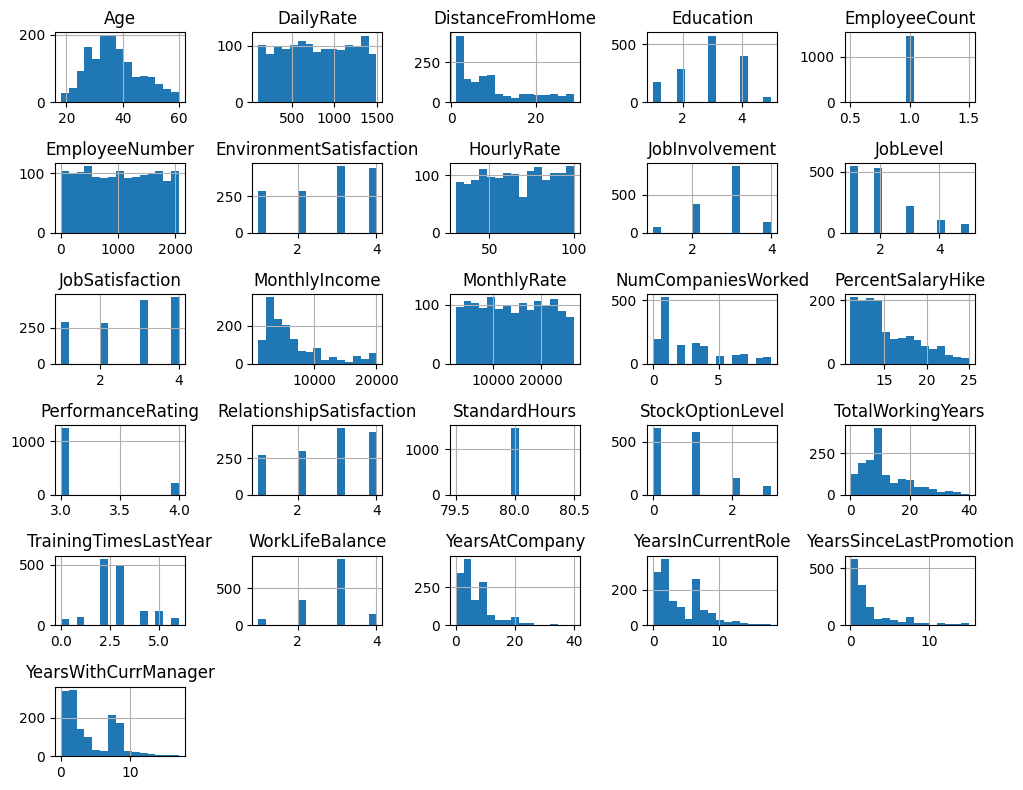

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms
data.hist(figsize=(10, 8), bins=15)
plt.tight_layout()
plt.show()

In [9]:
# Frequency counts for categorical columns
print(data['Attrition'].value_counts())
print(data['JobRole'].value_counts())



Attrition
No     1233
Yes     237
Name: count, dtype: int64
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


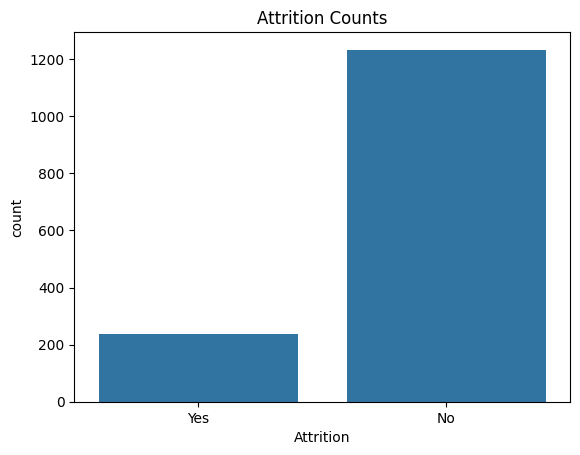

In [10]:
# Visual summaries
sns.countplot(x='Attrition', data=data)
plt.title('Attrition Counts')
plt.show()

d. Explore relationships

Which numerical variables correlate with attrition?

C:\Users\user\AppData\Local\Temp\ipykernel_12072\4093208559.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data['Attrition_Encoded'] = data['Attrition_Encoded']


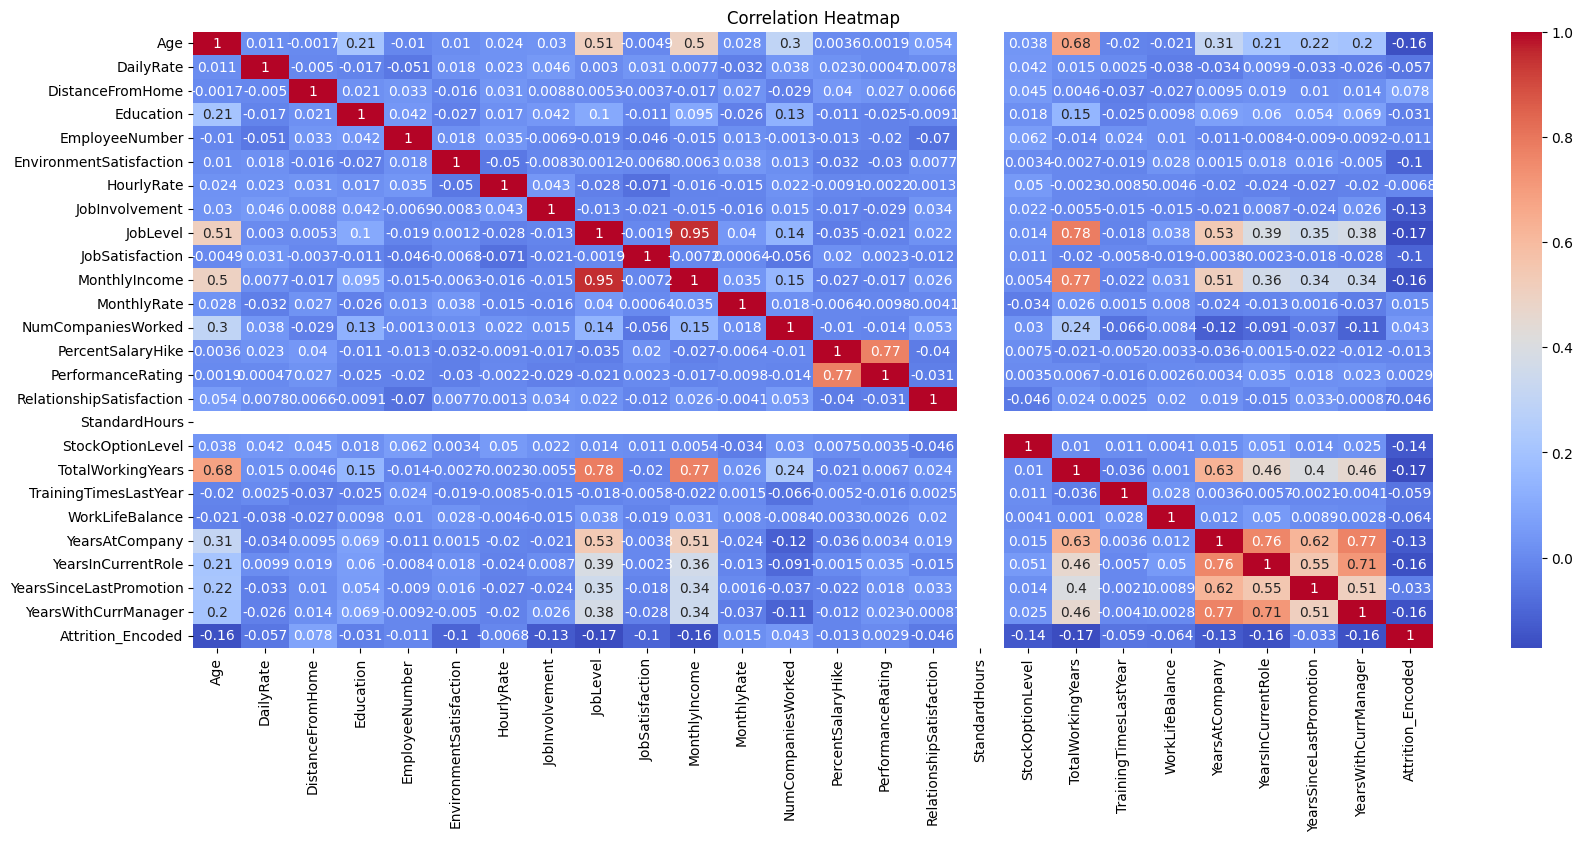

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Encode categorical variables like 'Attrition'
data['Attrition_Encoded'] = data['Attrition'].map({'Yes': 1, 'No': 0})

columns_to_drop = ['EmployeeCount', 'Over18'] # Drop unuseful columns 
data = data.drop(columns_to_drop, axis=1)

# Select only numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
numeric_data = data[numeric_cols]

# Add the encoded attrition column
numeric_data['Attrition_Encoded'] = data['Attrition_Encoded']

# Correlation matrix
correlations = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()




How do satisfaction scores relate to attrition?


C:\Users\user\AppData\Local\Temp\ipykernel_12072\1527670888.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Attrition', y=column, palette="Set2")
C:\Users\user\AppData\Local\Temp\ipykernel_12072\1527670888.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Attrition', y=column, palette="Set2")
C:\Users\user\AppData\Local\Temp\ipykernel_12072\1527670888.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Attrition', y=column, palette="Set2")


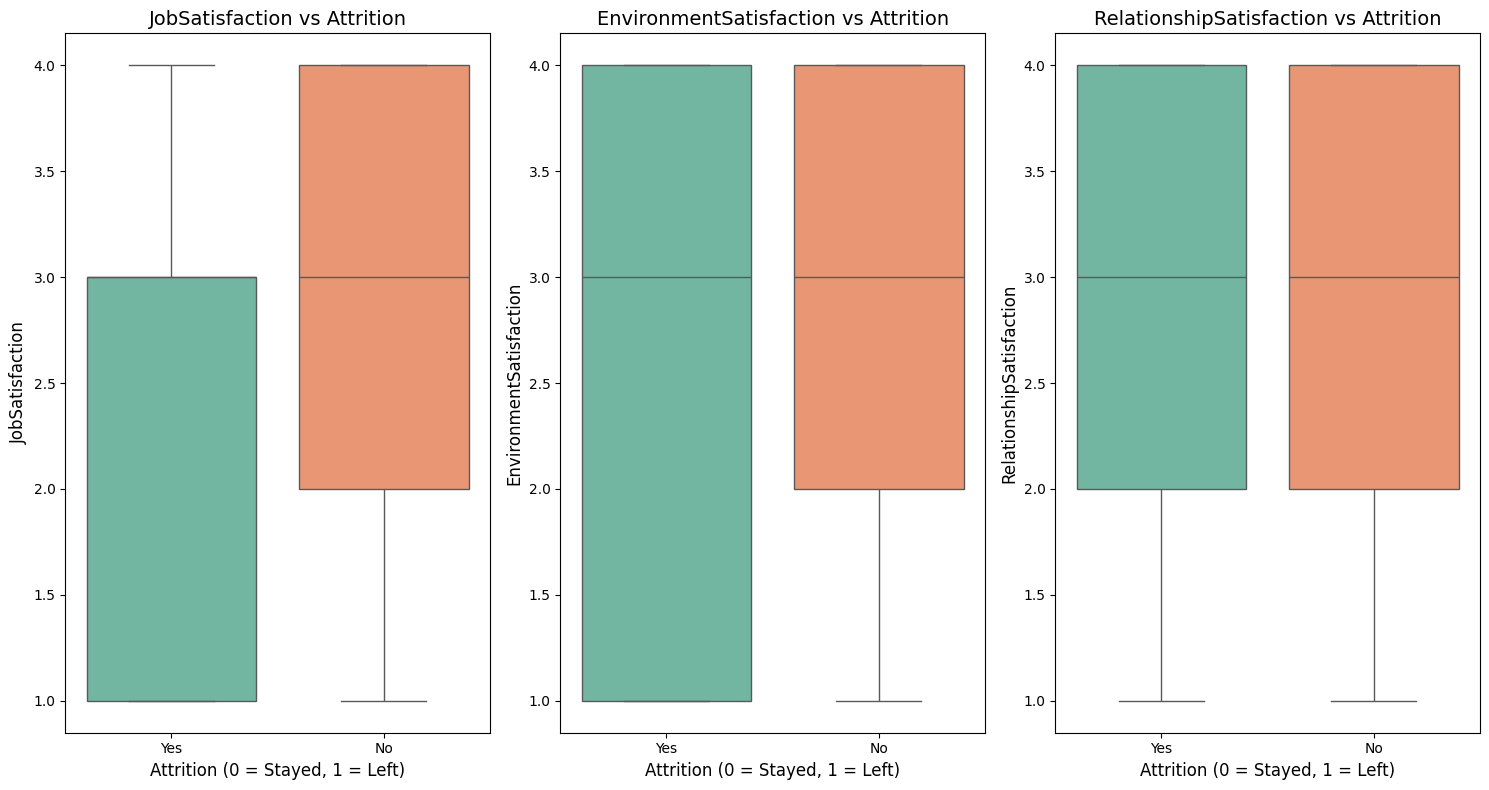

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for satisfaction scores
plt.figure(figsize=(15, 8))
satisfaction_columns = ['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction']

for i, column in enumerate(satisfaction_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=data, x='Attrition', y=column, palette="Set2")
    plt.title(f"{column} vs Attrition", fontsize=14)
    plt.xlabel("Attrition (0 = Stayed, 1 = Left)", fontsize=12)
    plt.ylabel(column, fontsize=12)

plt.tight_layout()
plt.show()


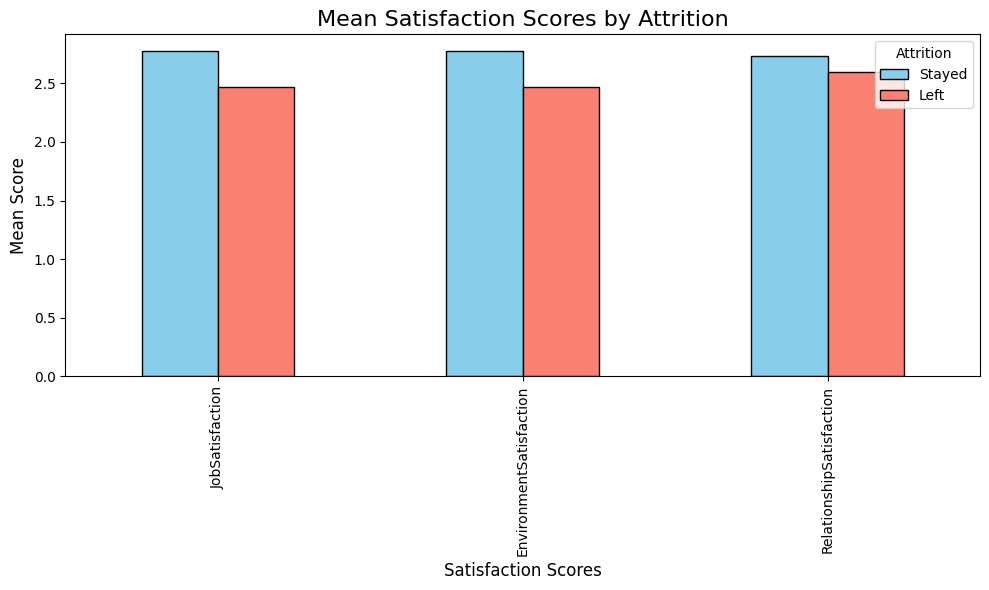

In [13]:
# Calculate mean satisfaction scores grouped by attrition
mean_scores = data.groupby('Attrition')[['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction']].mean()

# Plot mean satisfaction scores
mean_scores.T.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'], edgecolor='black')
plt.title("Mean Satisfaction Scores by Attrition", fontsize=16)
plt.xlabel("Satisfaction Scores", fontsize=12)
plt.ylabel("Mean Score", fontsize=12)
plt.legend(["Stayed", "Left"], title="Attrition")
plt.tight_layout()
plt.show()


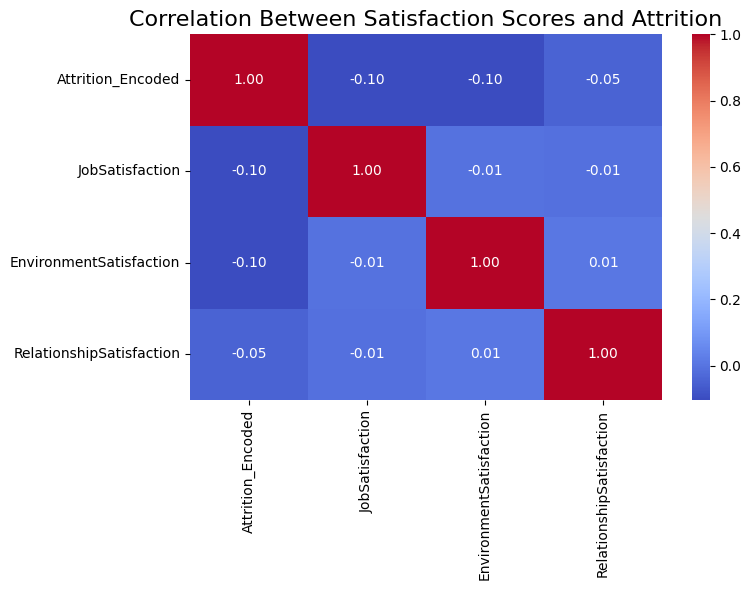

In [14]:
# Calculate correlation matrix for satisfaction scores and attrition
correlation_matrix = data[['Attrition_Encoded', 'JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Satisfaction Scores and Attrition", fontsize=16)
plt.tight_layout()
plt.show()


What roles or departments have the highest attrition rates?

C:\Users\user\AppData\Local\Temp\ipykernel_12072\2021916159.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=role_attrition.index, y=role_attrition.values, palette="viridis")


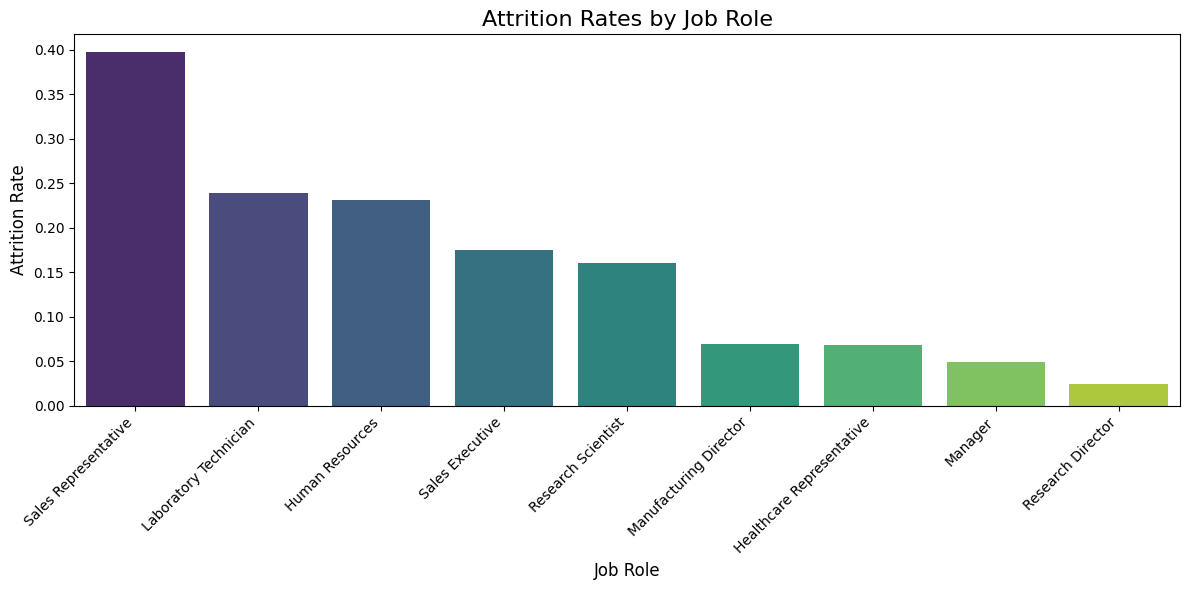

C:\Users\user\AppData\Local\Temp\ipykernel_12072\2021916159.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_attrition.index, y=dept_attrition.values, palette="magma")


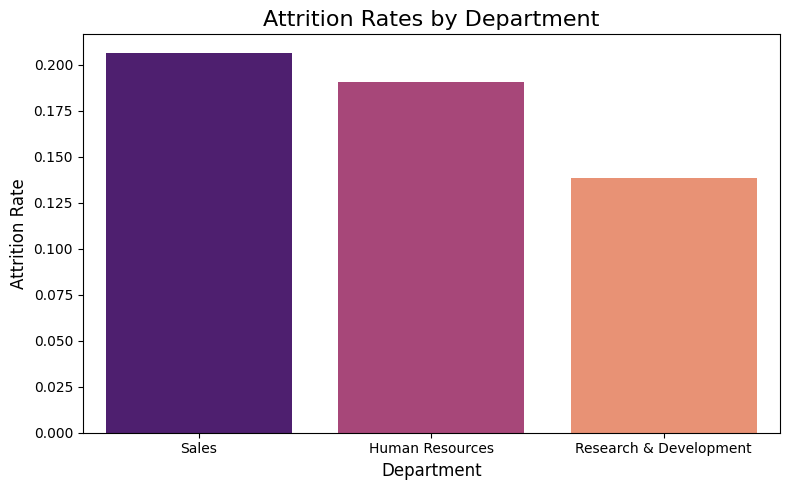

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example grouping by JobRole
role_attrition = data.groupby('JobRole')['Attrition_Encoded'].mean().sort_values(ascending=False)

# Plotting the attrition rates by JobRole
plt.figure(figsize=(12, 6))
sns.barplot(x=role_attrition.index, y=role_attrition.values, palette="viridis")
plt.title("Attrition Rates by Job Role", fontsize=16)
plt.ylabel("Attrition Rate", fontsize=12)
plt.xlabel("Job Role", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Example grouping by Department
dept_attrition = data.groupby('Department')['Attrition_Encoded'].mean().sort_values(ascending=False)

# Plotting the attrition rates by Department
plt.figure(figsize=(8, 5))
sns.barplot(x=dept_attrition.index, y=dept_attrition.values, palette="magma")
plt.title("Attrition Rates by Department", fontsize=16)
plt.ylabel("Attrition Rate", fontsize=12)
plt.xlabel("Department", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


How does monthly income influence attrition?

C:\Users\user\AppData\Local\Temp\ipykernel_12072\1904779302.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Attrition', y='MonthlyIncome', palette="Set2")


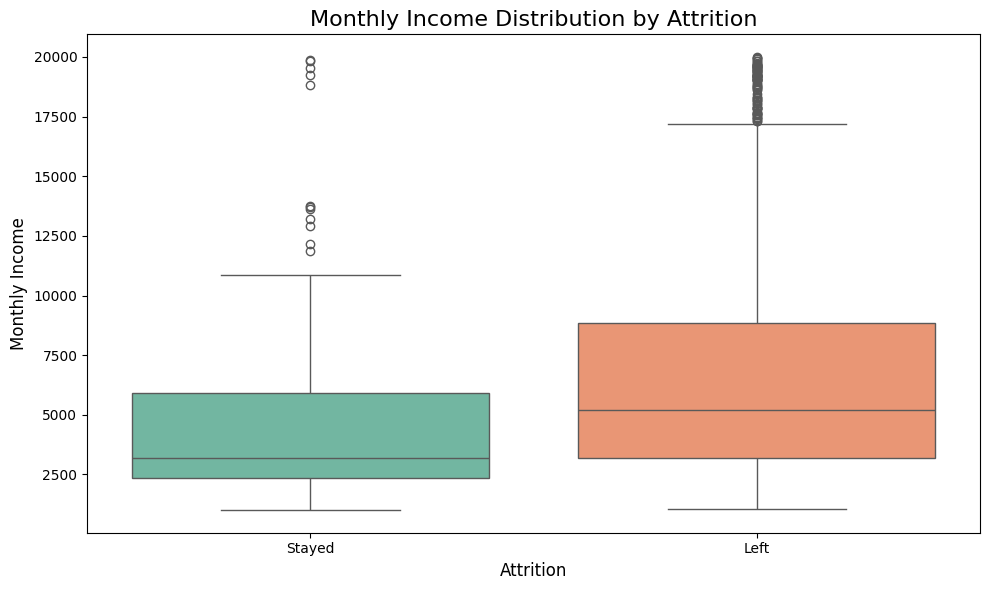

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for Monthly Income vs Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Attrition', y='MonthlyIncome', palette="Set2")
plt.title("Monthly Income Distribution by Attrition", fontsize=16)
plt.xlabel("Attrition", fontsize=12)
plt.ylabel("Monthly Income", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Stayed", "Left"])
plt.tight_layout()
plt.show()




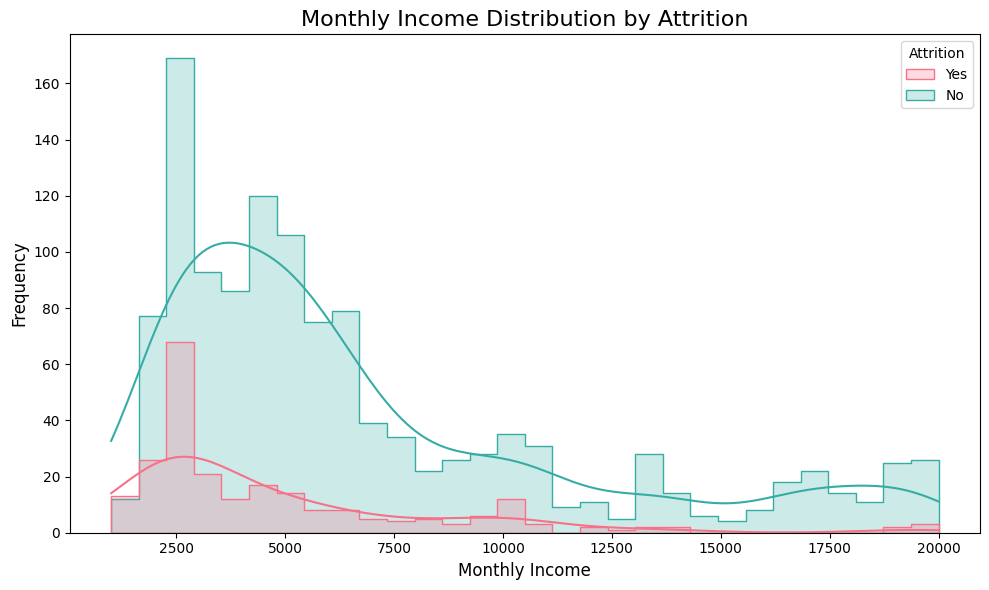

In [17]:
# Histogram for Monthly Income by Attrition
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='MonthlyIncome', hue='Attrition', kde=True, bins=30, palette="husl", element="step")
plt.title("Monthly Income Distribution by Attrition", fontsize=16)
plt.xlabel("Monthly Income", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()



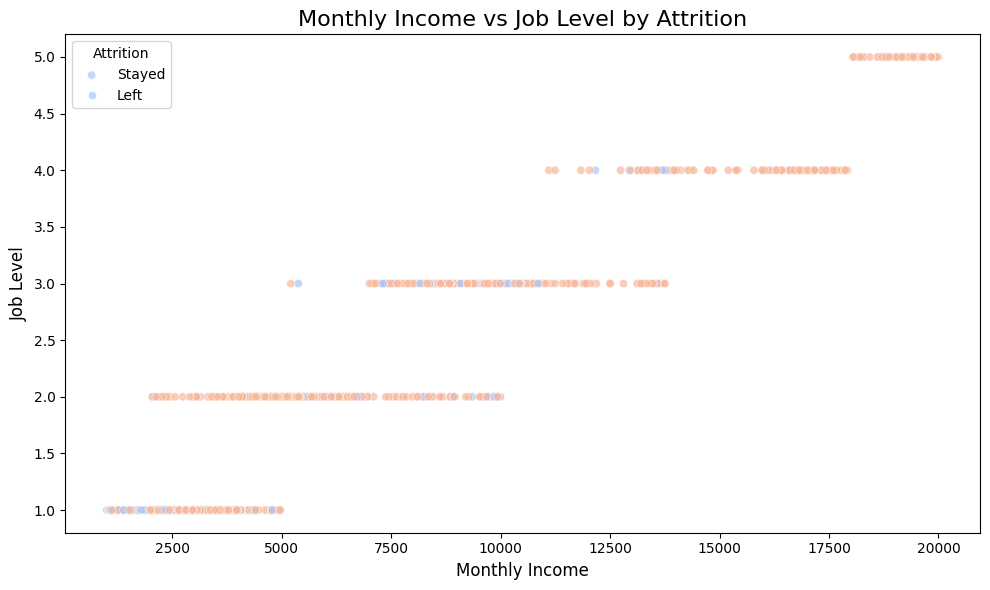

In [18]:
# Scatter plot to observe patterns (e.g., by Job Level and Attrition)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='MonthlyIncome', y='JobLevel', hue='Attrition', alpha=0.7, palette="coolwarm")
plt.title("Monthly Income vs Job Level by Attrition", fontsize=16)
plt.xlabel("Monthly Income", fontsize=12)
plt.ylabel("Job Level", fontsize=12)
plt.legend(title="Attrition", labels=["Stayed", "Left"])
plt.tight_layout()
plt.show()

Positive Correlation:

TotalWorkingYears: A higher number of total working years is positively correlated with attrition. This suggests that employees with longer tenures are more likely to leave.
YearsAtCompany: Similar to TotalWorkingYears, a higher number of years at the company is positively correlated with attrition. This could indicate that employees who have been with the company for a longer time may be more likely to leave.
YearsInCurrentRole: A higher number of years in the current role is also positively correlated with attrition, suggesting that employees who have been in their current role for a longer time may be more likely to leave.
Negative Correlation:

JobSatisfaction: A lower job satisfaction is negatively correlated with attrition, indicating that employees with lower job satisfaction are more likely to leave.
RelationshipSatisfaction: A lower relationship satisfaction is negatively correlated with attrition, suggesting that employees with lower relationship satisfaction with their colleagues and supervisors are more likely to leave.
WorkLifeBalance: A lower work-life balance is negatively correlated with attrition, suggesting that employees with a poor work-life balance are more likely to leave.

How do satisfaction scores relate to attrition?


Overall Trend: Job and environment satisfaction show small negative correlations with attrition, indicating that dissatisfaction in these areas slightly increases the likelihood of leaving.
Implication for Retention Strategies: While these correlations are weak, they suggest focusing on improving job satisfaction and the workplace environment as part of employee retention efforts. These factors, while not strongly predictive, might still influence attrition when combined with other variables.

2.a How does overtime work correlate with satisfaction and attrition?

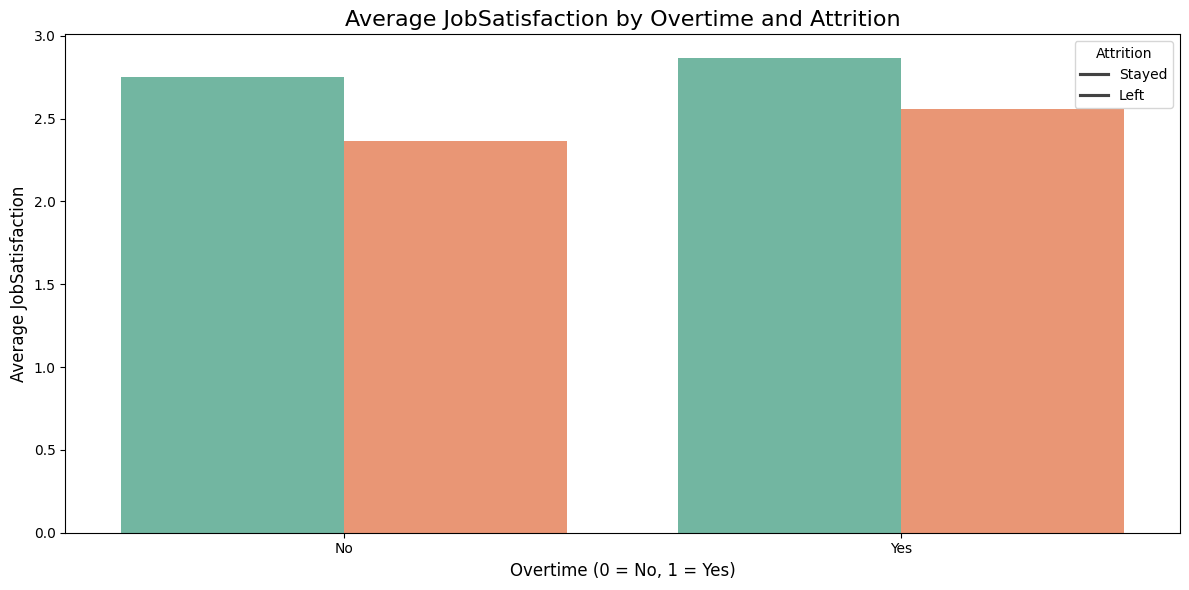

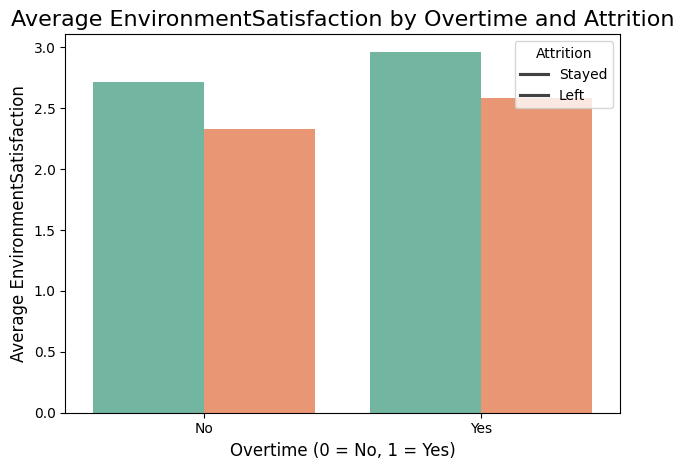

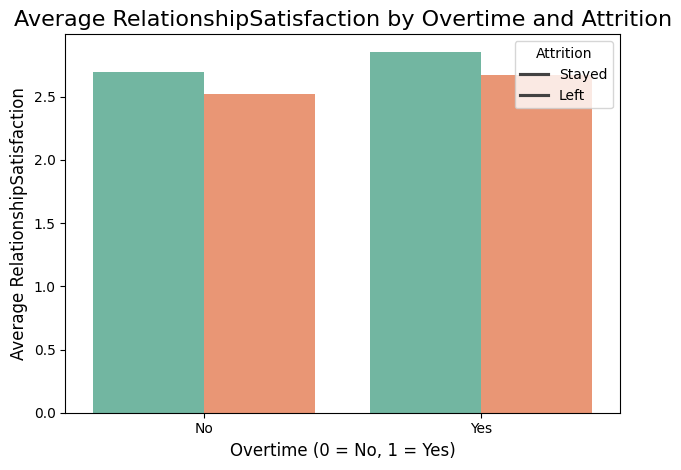

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean satisfaction scores grouped by overtime and attrition
satisfaction_columns = ['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction']
grouped_means = data.groupby(['OverTime', 'Attrition'])[satisfaction_columns].mean().reset_index()

# Plot grouped bar plots
plt.figure(figsize=(12, 6))
for column in satisfaction_columns:
    sns.barplot(data=grouped_means, x='OverTime', y=column, hue='Attrition', palette="Set2")
    plt.title(f"Average {column} by Overtime and Attrition", fontsize=16)
    plt.xlabel("Overtime (0 = No, 1 = Yes)", fontsize=12)
    plt.ylabel(f"Average {column}", fontsize=12)
    plt.legend(title="Attrition", labels=["Stayed", "Left"])
    plt.tight_layout()
    plt.show()


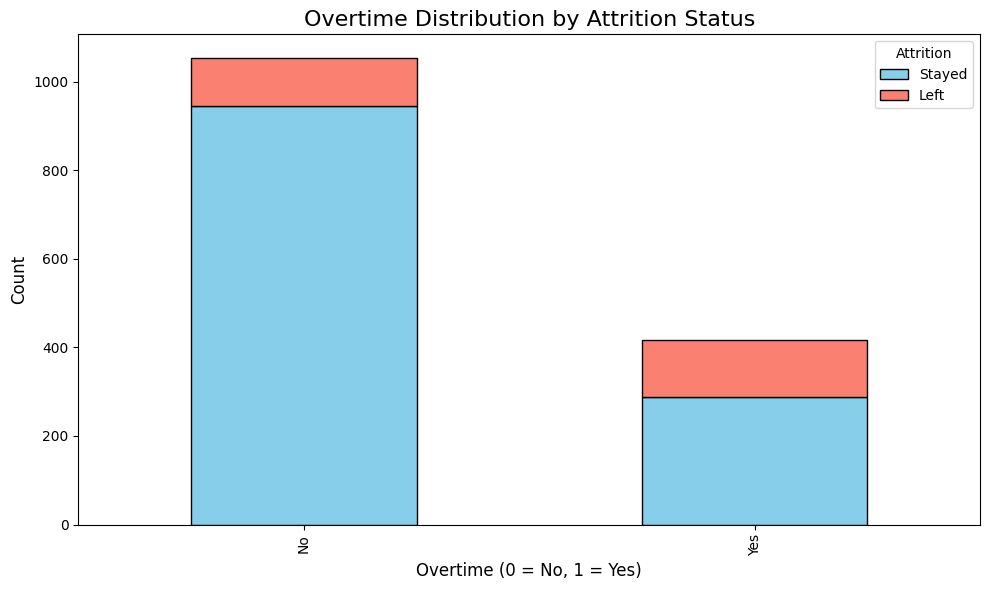

In [20]:
# Count of employees by overtime and attrition
overtime_attrition_counts = data.groupby(['OverTime', 'Attrition']).size().unstack(fill_value=0)

# Plot stacked bar chart
overtime_attrition_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'], edgecolor='black')
plt.title("Overtime Distribution by Attrition Status", fontsize=16)
plt.xlabel("Overtime (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(["Stayed", "Left"], title="Attrition")
plt.tight_layout()
plt.show()


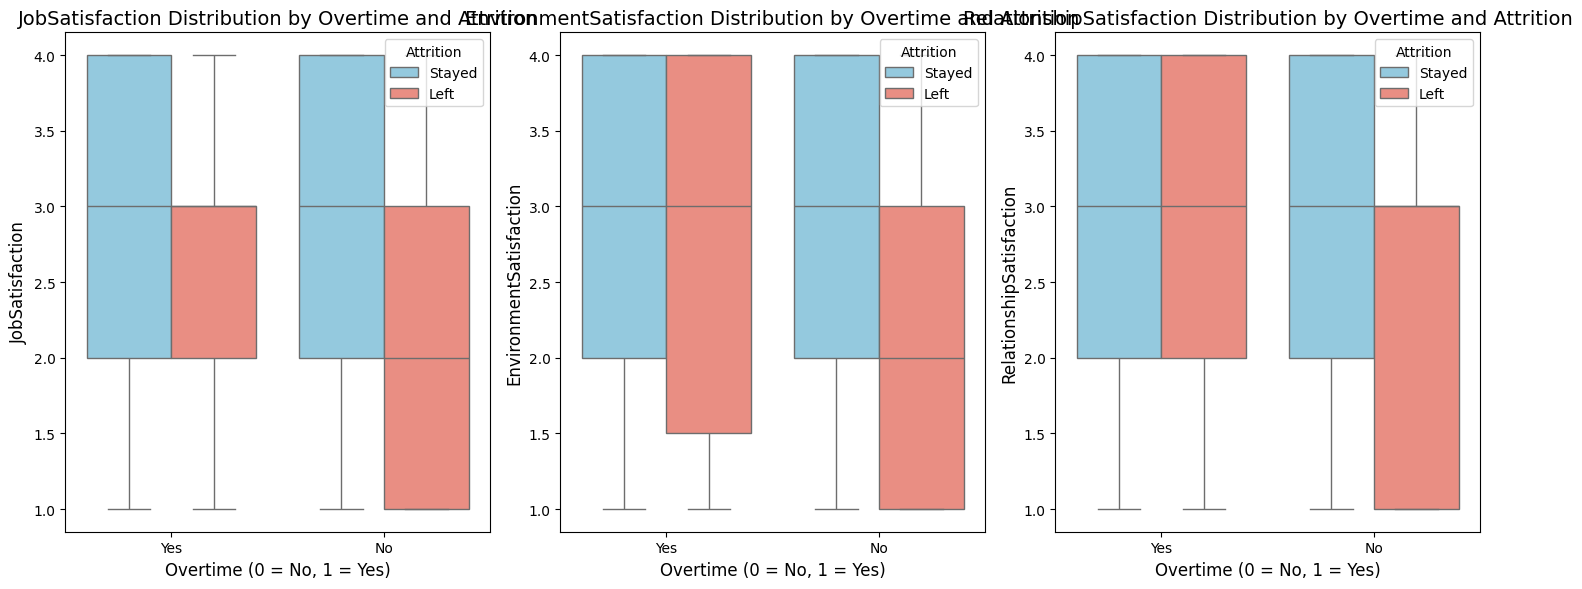

In [21]:
# Box plot for satisfaction scores by overtime and attrition
plt.figure(figsize=(15, 6))

# Define distinct colors for "Stayed" and "Left"
palette = {0: "skyblue", 1: "salmon"}  # 0 = Stayed, 1 = Left

for i, column in enumerate(satisfaction_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=data, x='OverTime', y=column, hue='Attrition_Encoded', palette=palette)
    plt.title(f"{column} Distribution by Overtime and Attrition", fontsize=14)
    plt.xlabel("Overtime (0 = No, 1 = Yes)", fontsize=12)
    plt.ylabel(column, fontsize=12)

    # Get current legend handles and labels
    handles, _ = plt.gca().get_legend_handles_labels()

    # Update the legend with distinct colors
    plt.legend(handles, ["Stayed", "Left"], title="Attrition", loc='upper right')

    plt.tight_layout()

plt.show()


In [22]:
data.dtypes



Age                          int64
CF_age band                 object
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

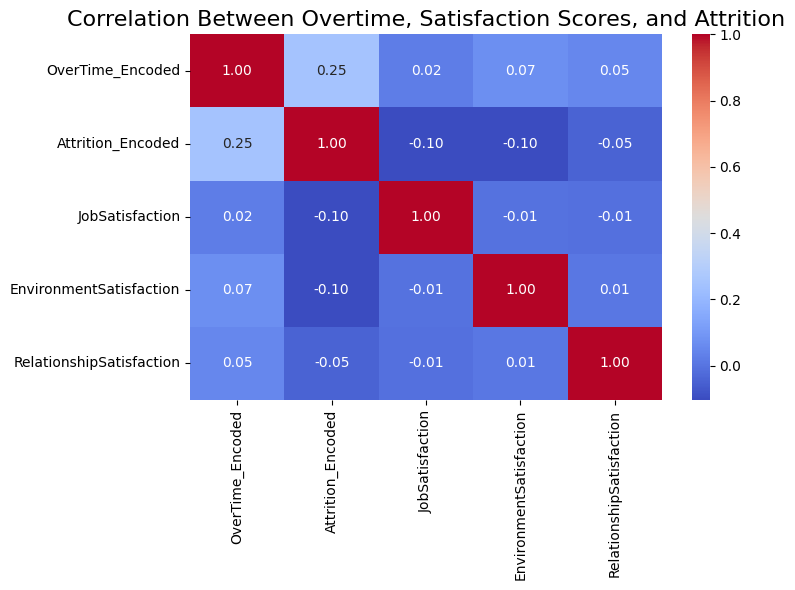

In [23]:
# Create correlation matrix for relevant variables

data['OverTime_Encoded'] = data['OverTime'].map({'Yes': 1, 'No': 0})  # Encode Overtime if not already
relevant_columns = ['OverTime_Encoded', 'Attrition_Encoded', 'JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction']
correlation_matrix = data[relevant_columns].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Overtime, Satisfaction Scores, and Attrition", fontsize=16)
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_12072\2459281130.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=worklife_attrition.index, y=worklife_attrition.values, palette="coolwarm")


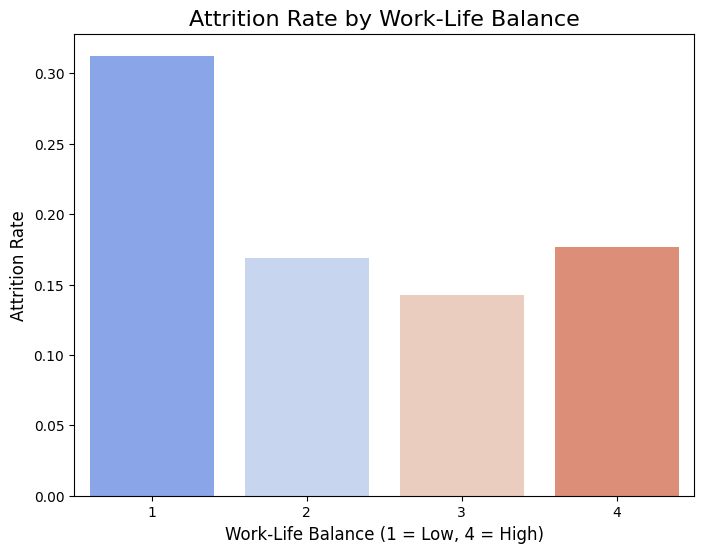

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by WorkLifeBalance and calculate attrition rates
worklife_attrition = data.groupby('WorkLifeBalance')['Attrition_Encoded'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=worklife_attrition.index, y=worklife_attrition.values, palette="coolwarm")

# Add labels and title
plt.title("Attrition Rate by Work-Life Balance", fontsize=16)
plt.xlabel("Work-Life Balance (1 = Low, 4 = High)", fontsize=12)
plt.ylabel("Attrition Rate", fontsize=12)

# Show the plot
plt.show()


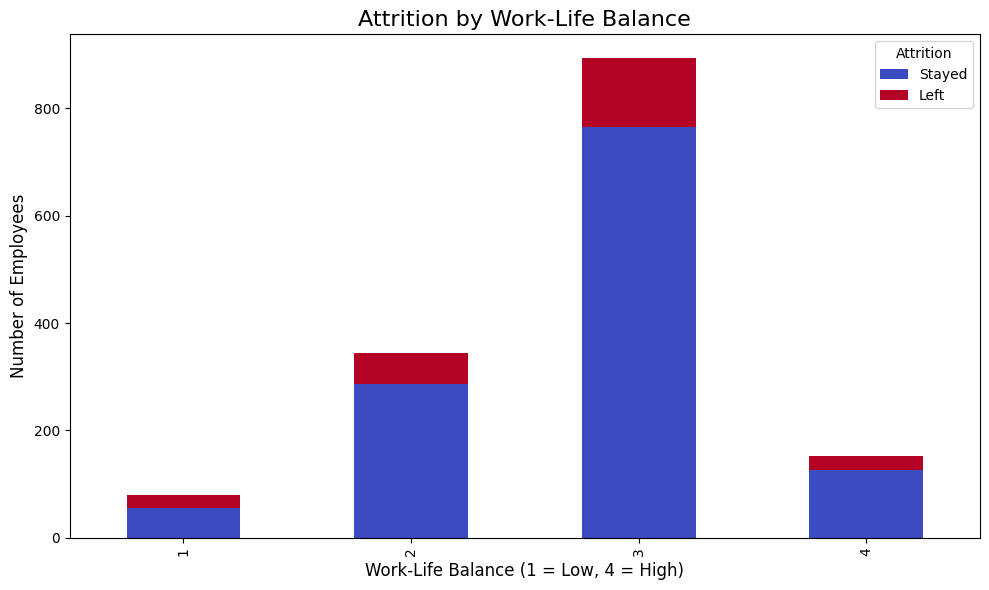

In [25]:
# Prepare data for a stacked bar chart
stacked_data = data.groupby(['WorkLifeBalance', 'Attrition_Encoded']).size().unstack()

# Plot stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="coolwarm")

# Add labels and title
plt.title("Attrition by Work-Life Balance", fontsize=16)
plt.xlabel("Work-Life Balance (1 = Low, 4 = High)", fontsize=12)
plt.ylabel("Number of Employees", fontsize=12)
plt.legend(title="Attrition", labels=["Stayed", "Left"], fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


4.b.. Assess Data Quality 

Objective:
Ensure the dataset is clean for reliable analysis and modeling.

Columns Involved:

All, with a focus on variables that may contain anomalies: Age, MonthlyIncome, YearsAtCompany.
Categorical variables like Attrition and JobRole for invalid or duplicate entries.

Why:
This step addresses potential biases in results that might mislead analysis for MBQ 1 & MBQ 2 (e.g., if outliers skew satisfaction scores or income levels).

"How does job involvement relate to employee retention?"

C:\Users\user\AppData\Local\Temp\ipykernel_12072\3148752271.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_involvement_attrition.index, y=job_involvement_attrition.values, palette="viridis")


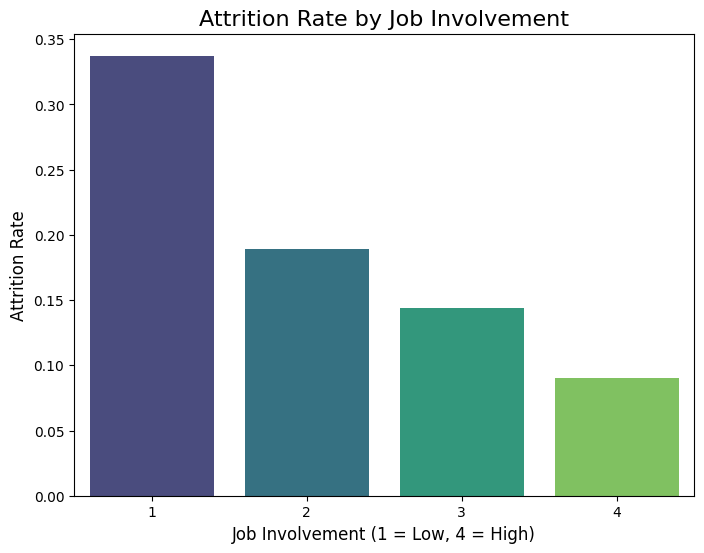

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by JobInvolvement and calculate attrition rates
job_involvement_attrition = data.groupby('JobInvolvement')['Attrition_Encoded'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=job_involvement_attrition.index, y=job_involvement_attrition.values, palette="viridis")

# Add labels and title
plt.title("Attrition Rate by Job Involvement", fontsize=16)
plt.xlabel("Job Involvement (1 = Low, 4 = High)", fontsize=12)
plt.ylabel("Attrition Rate", fontsize=12)

# Show the plot
plt.show()


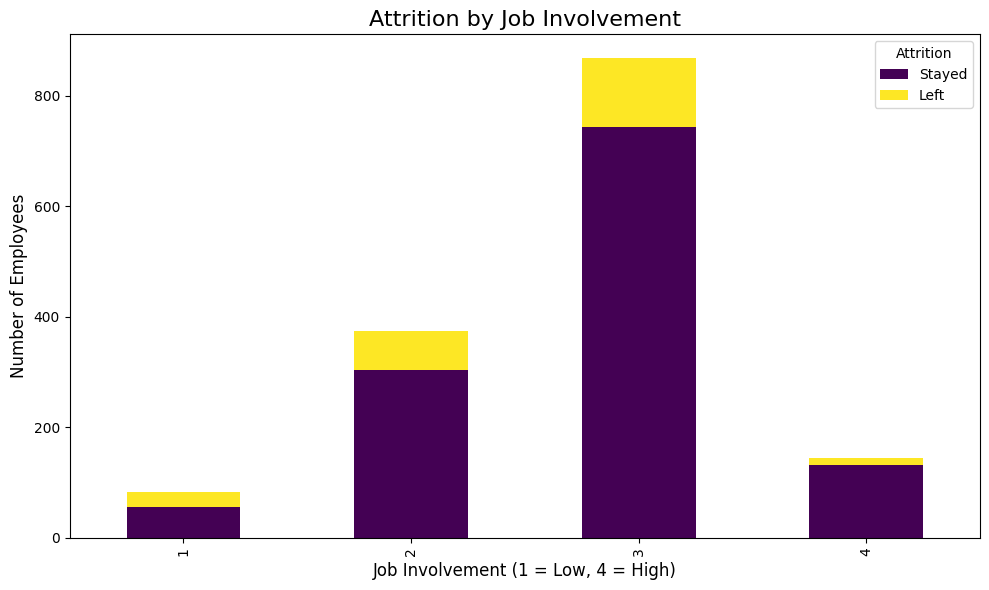

In [27]:
# Prepare data for a stacked bar chart
stacked_data = data.groupby(['JobInvolvement', 'Attrition_Encoded']).size().unstack()

# Plot stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")

# Add labels and title
plt.title("Attrition by Job Involvement", fontsize=16)
plt.xlabel("Job Involvement (1 = Low, 4 = High)", fontsize=12)
plt.ylabel("Number of Employees", fontsize=12)
plt.legend(title="Attrition", labels=["Stayed", "Left"], fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


How does marital status influence attrition?

C:\Users\user\AppData\Local\Temp\ipykernel_12072\7155345.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=marital_status_attrition.index, y=marital_status_attrition.values, palette="muted")


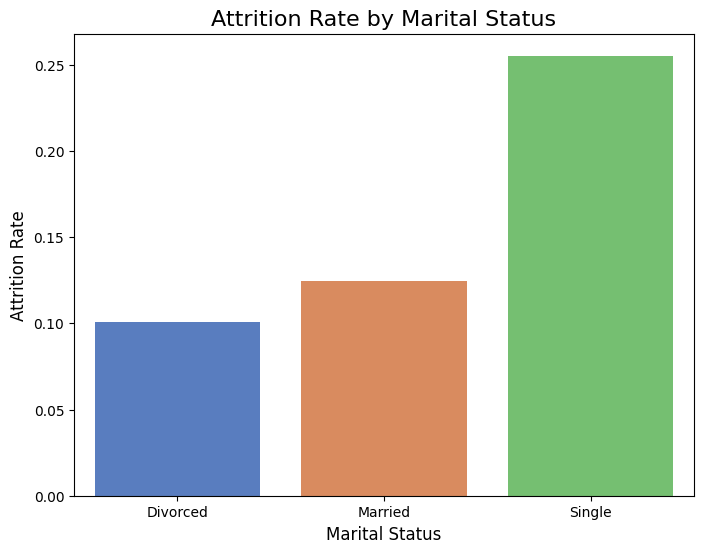

In [28]:
# Calculate attrition rates by marital status
marital_status_attrition = data.groupby('MaritalStatus')['Attrition_Encoded'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=marital_status_attrition.index, y=marital_status_attrition.values, palette="muted")

# Add labels and title
plt.title("Attrition Rate by Marital Status", fontsize=16)
plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("Attrition Rate", fontsize=12)

# Show the plot
plt.show()


Are employees in specific education fields more likely to leave?

C:\Users\user\AppData\Local\Temp\ipykernel_12072\2394183345.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_field_attrition.index, y=education_field_attrition.values, palette="muted")


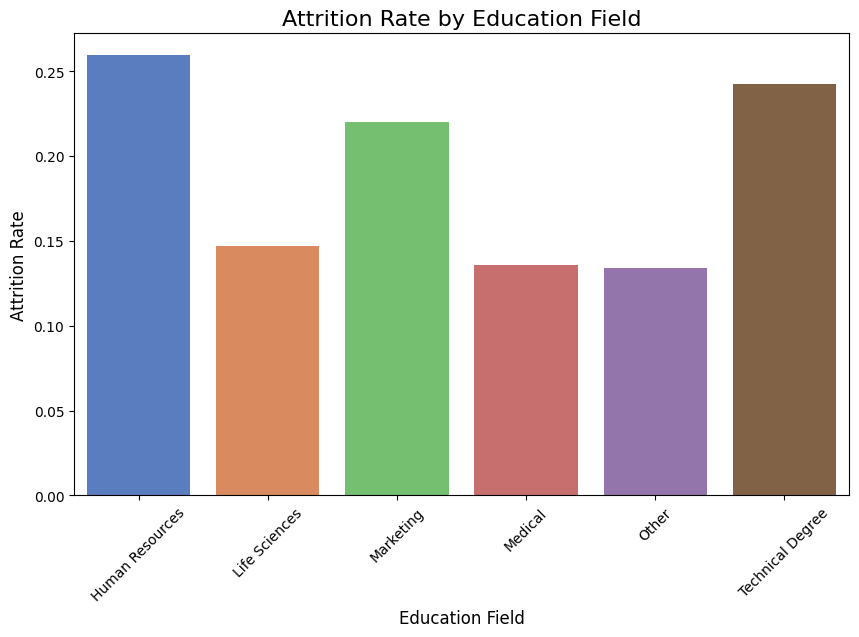

In [29]:
# Calculate attrition rates by education field
education_field_attrition = data.groupby('EducationField')['Attrition_Encoded'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=education_field_attrition.index, y=education_field_attrition.values, palette="muted")

# Add labels and title
plt.title("Attrition Rate by Education Field", fontsize=16)
plt.xlabel("Education Field", fontsize=12)
plt.ylabel("Attrition Rate", fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.show()


How does age distribution differ for employees who left vs. stayed?

C:\Users\user\AppData\Local\Temp\ipykernel_12072\1435327425.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Attrition_Encoded'] == 0]['Age'], label="Stayed", shade=True, color="blue")
C:\Users\user\AppData\Local\Temp\ipykernel_12072\1435327425.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Attrition_Encoded'] == 1]['Age'], label="Left", shade=True, color="red")


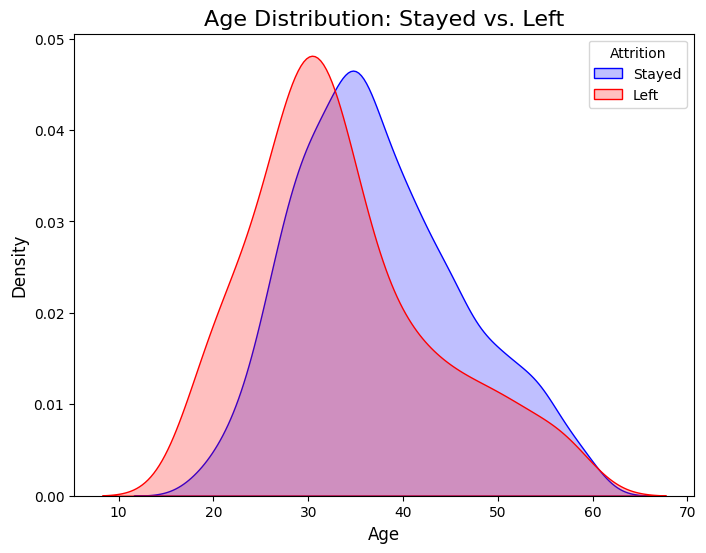

In [30]:
# KDE plot for age distribution
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data[data['Attrition_Encoded'] == 0]['Age'], label="Stayed", shade=True, color="blue")
sns.kdeplot(data=data[data['Attrition_Encoded'] == 1]['Age'], label="Left", shade=True, color="red")

# Add labels and title
plt.title("Age Distribution: Stayed vs. Left", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Attrition")

# Show the plot
plt.show()


Is there a difference in attrition rates between genders?

C:\Users\user\AppData\Local\Temp\ipykernel_12072\693578174.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_attrition.index, y=gender_attrition.values, palette="coolwarm")


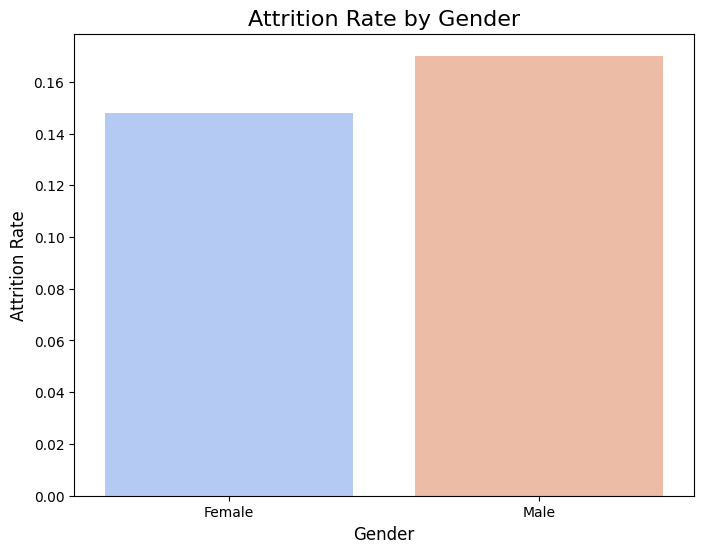

In [31]:
# Calculate attrition rates by gender
gender_attrition = data.groupby('Gender')['Attrition_Encoded'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_attrition.index, y=gender_attrition.values, palette="coolwarm")

# Add labels and title
plt.title("Attrition Rate by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Attrition Rate", fontsize=12)

# Show the plot
plt.show()


In [32]:
data.dtypes

Age                          int64
CF_age band                 object
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

integrate clustering and Random Forest using the provided dataset structure.

The dataset shows variability of patterns among the existing features. There is a need to cluster the dataset based on each cluster's similar characteristics and therefore will ease the development of intervention for each cluster afterwards

Step 1: Prepare the Dataset
Before applying clustering and Random Forest, preprocess the data to ensure compatibility with both methods.

Features to use as bases for Clustering:

1. MonthlyIncome:
   High importance and likely a strong differentiator for employees’ financial satisfaction and stability.

2. Age:
   A demographic feature that influences career stage and priorities.

3. OverTime_Encoded:
   A behavioral indicator that could reflect work habits or job demands.

4. TotalWorkingYears:
    Captures overall experience, often linked to seniority and job stability.

5. YearsAtCompany:
    Indicates tenure, which can highlight loyalty or the likelihood of attrition.

6. DistanceFromHome:
   A lifestyle factor that often correlates with satisfaction and likelihood of leaving.

7. EnvironmentSatisfaction:
   Provides insight into how employees perceive their workplace.

8. JobLevel:
   Reflects seniority, which can tie to compensation and responsibilities.

Cluster the Dataset into 2 

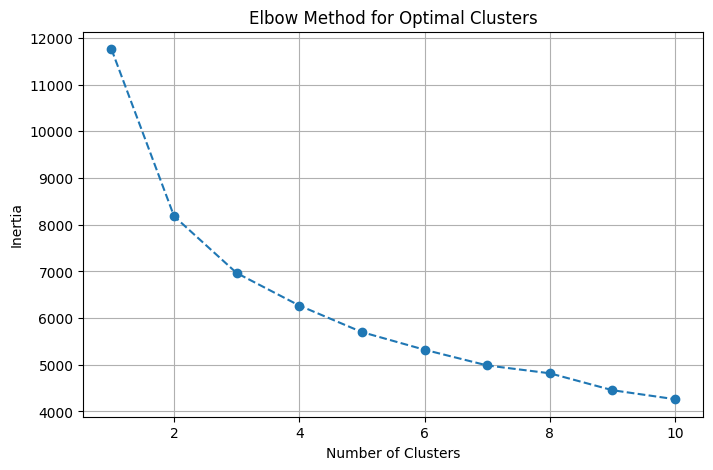

Clustered data has been saved to clustered_data.xlsx.
Cluster Centers:
   MonthlyIncome        Age  JobLevel  OverTime_Encoded  \
0    4593.459459  34.597973  1.638514           0.28125   
1   14407.877622  46.552448  3.825175           0.29021   

   EnvironmentSatisfaction  TotalWorkingYears  YearsAtCompany  \
0                 2.727196           8.319257         5.43750   
1                 2.699301          23.534965        13.51049   

   DistanceFromHome  
0          9.215372  
1          9.097902  


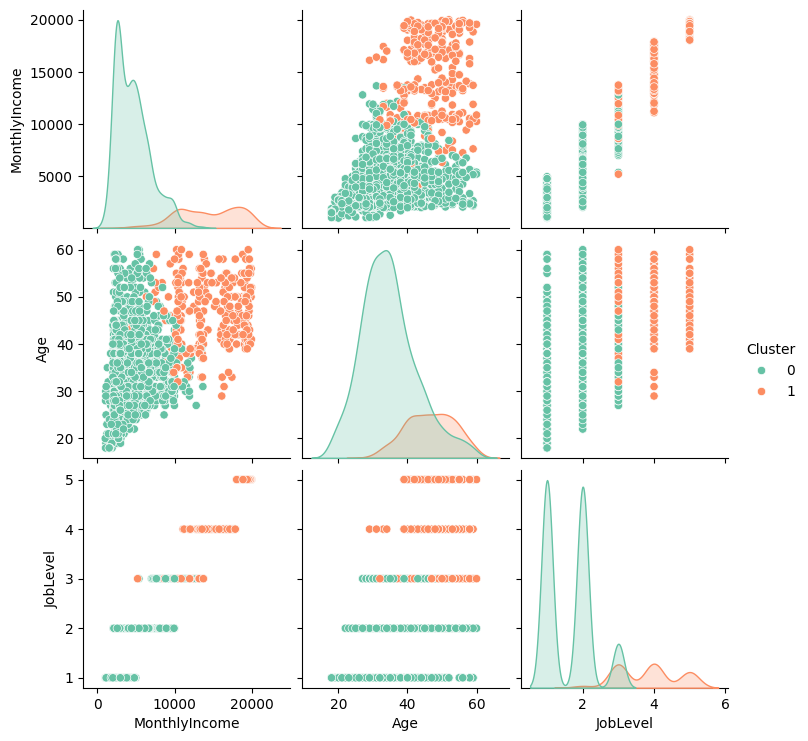

In [33]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 8 features for clustering
selected_features = [
    'MonthlyIncome', 'Age', 'JobLevel', 'OverTime_Encoded',
    'EnvironmentSatisfaction', 'TotalWorkingYears', 'YearsAtCompany', 'DistanceFromHome'
]

# Prepare the data with selected features
data_selected = data[selected_features]

# Handle missing values if any (optional)
data_selected = data_selected.dropna()

# Scale the features to normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# Determine the optimal number of clusters using the elbow method
inertia = []
range_n_clusters = range(1, 11)  # Checking from 1 to 10 clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve to identify the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Choose the number of clusters based on the elbow plot (e.g., 4 clusters)
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)


# Save the dataframe with clusters to an Excel file
output_file = "clustered_data.xlsx"
data.to_excel(output_file, index=False)

print(f"Clustered data has been saved to {output_file}.")


# Display the cluster centers in original scale for interpretation
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=selected_features)

print("Cluster Centers:")
print(cluster_centers_df)

# Visualize the clusters using a pairplot
data['Cluster'] = data['Cluster'].astype(str)  # Convert to string for categorical plotting
sns.pairplot(data, vars=selected_features[:3], hue='Cluster', palette='Set2', diag_kind='kde')
plt.show()


In [34]:
data.dtypes

Age                          int64
CF_age band                 object
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

Insights:

Cluster 0: "Early Career, Lower Income"

Profile:
Younger employees (average age ~34.6 years), early in their careers (average job level ~1.6).
Moderate monthly income (~4593).
Higher attrition probability (17.99%).
Shorter total working years (~8.3) and tenure at the company (~5.4 years).
Possible Factors:
Lower income and experience levels suggest they may be seeking better growth opportunities elsewhere.
Attrition could also be driven by dissatisfaction with job roles or limited career progression.

Cluster 1: "Cluster 1: Experienced Professionals, Higher Income"

Profile:
Older employees (average age ~46.6 years) with significant career experience (~23.5 total working years).
Senior roles (average job level ~3.8) and higher income (~14407).
Lower attrition probability (8.39%).
Possible Factors:
Higher income and seniority may offer stability and satisfaction.
Attrition in this group might be due to retirement or personal reasons rather than dissatisfaction.

Identify the Attrition Probabilities for Each Cluster

In [35]:
import pandas as pd

# Assuming `kmeans` is the KMeans model and `data` is the DataFrame with the relevant data
# Add the cluster labels to the original data
data['Cluster'] = kmeans.labels_

# Calculate the attrition probability for each cluster
attrition_probabilities = data.groupby('Cluster')['Attrition_Encoded'].mean()

# Display the attrition probabilities for each cluster
print("Attrition Probabilities for Each Cluster:")
print(attrition_probabilities)


Attrition Probabilities for Each Cluster:
Cluster
0    0.179899
1    0.083916
Name: Attrition_Encoded, dtype: float64


Predict Attrition by each cluster, Identify the Feature Importance (The Most Influencing Factors for Attrition) and Evaluate the Prediction Performance (Confusion Matrix)

Re-sampling is executed in Attrition column due to imbalance of data between Yes and No. It will improve the accuracy of the prediction as the machine will learn the pattern proportionally and avoid overfitting.


Processing Cluster 0...
Number of samples in original data: 1184
Number of samples after resampling: 1956
Number of positive (attrition) cases after resampling: 985
Number of negative (no attrition) cases after resampling: 971

Feature Importances:
                   Feature  Importance
0            MonthlyIncome    0.224782
7         DistanceFromHome    0.160259
1                      Age    0.159447
6           YearsAtCompany    0.134600
5        TotalWorkingYears    0.125380
4  EnvironmentSatisfaction    0.115647
3         OverTime_Encoded    0.040851
2                 JobLevel    0.039034


C:\Users\user\AppData\Local\Temp\ipykernel_12072\3691560317.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")


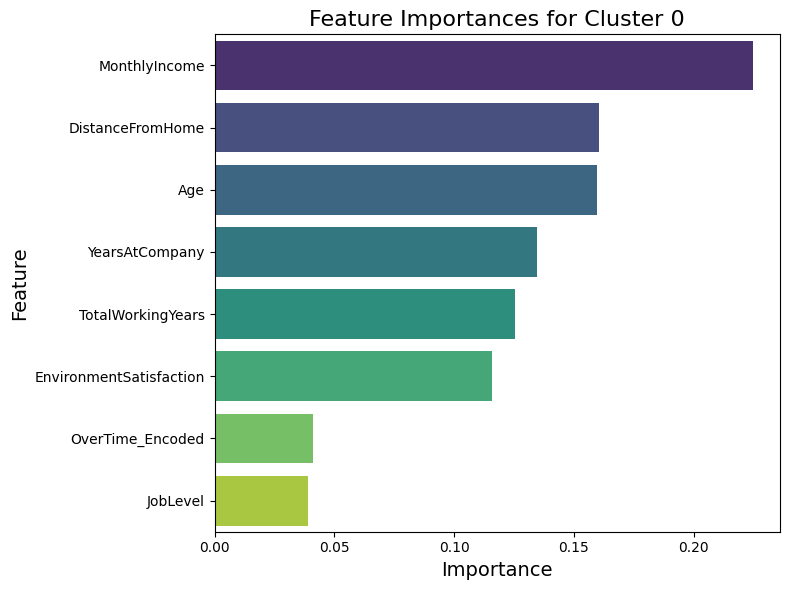


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       299
           1       0.81      0.88      0.84       288

    accuracy                           0.84       587
   macro avg       0.84      0.84      0.84       587
weighted avg       0.84      0.84      0.84       587


Confusion Matrix for Cluster 0:
              Predicted No Attrition  Predicted Attrition
No Attrition                     240                   59
Attrition                         36                  252

Top 10 High-Risk Employees for Cluster 0:
      EmployeeNumber              Department  JobLevel  \
1028            1448  Research & Development         1   
727             1012  Research & Development         1   
294              403  Research & Development         1   
859             1202  Research & Development         1   
337              455  Research & Development         1   
889             1244  Research & Development       

C:\Users\user\AppData\Local\Temp\ipykernel_12072\3691560317.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['Attrition_Probability'] = rf_model.predict_proba(X)[:, 1]
C:\Users\user\AppData\Local\Temp\ipykernel_12072\3691560317.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_risk['Cluster'] = cluster
C:\Users\user\AppData\Local\Temp\ipykernel_12072\3691560317.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

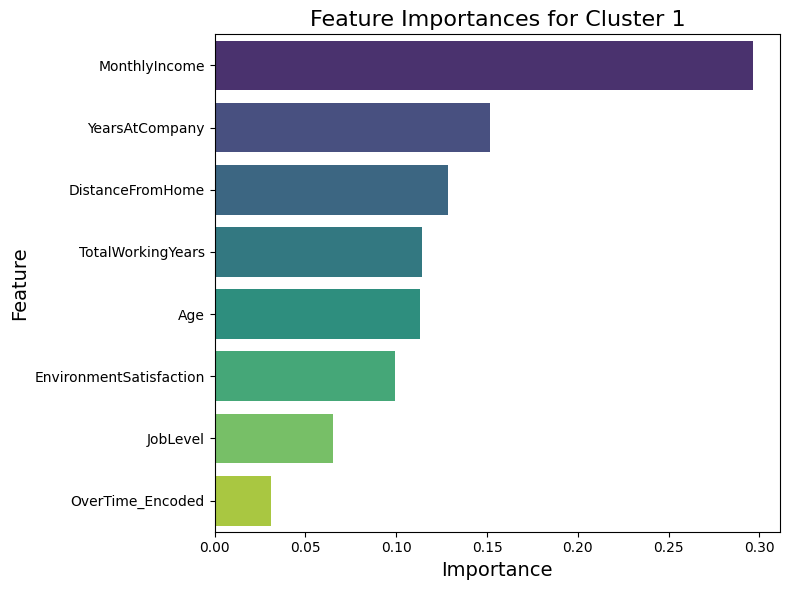


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89        76
           1       0.85      0.97      0.91        80

    accuracy                           0.90       156
   macro avg       0.91      0.90      0.90       156
weighted avg       0.91      0.90      0.90       156


Confusion Matrix for Cluster 1:
              Predicted No Attrition  Predicted Attrition
No Attrition                      62                   14
Attrition                          2                   78

Top 10 High-Risk Employees for Cluster 1:
      EmployeeNumber              Department  JobLevel  \
223              307                   Sales         3   
64                83  Research & Development         3   
411              549  Research & Development         5   
888             1243                   Sales         3   
307              421  Research & Development         3   
190              259  Research & Development       

C:\Users\user\AppData\Local\Temp\ipykernel_12072\3691560317.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['Attrition_Probability'] = rf_model.predict_proba(X)[:, 1]
C:\Users\user\AppData\Local\Temp\ipykernel_12072\3691560317.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_risk['Cluster'] = cluster


In [40]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

def cluster_attrition_analysis(data, cluster_column='Cluster', target_column='Attrition_Encoded', threshold=0.5):
    results = {}
    high_risk_employees = []
    top_10_employees_per_cluster = []
    all_feature_importances = []
    all_confusion_matrices = []

    # Iterate through each cluster
    for cluster in data[cluster_column].unique():
        print(f"\nProcessing Cluster {cluster}...")
        cluster_data = data[data[cluster_column] == cluster]

        # Define features and target
        feature_columns = ['MonthlyIncome', 'Age', 'JobLevel', 'OverTime_Encoded',
                           'EnvironmentSatisfaction', 'TotalWorkingYears', 'YearsAtCompany', 'DistanceFromHome']
        X = cluster_data[feature_columns]
        y = cluster_data[target_column]

        # Handle class imbalance using ADASYN
        adasyn = ADASYN()
        X_resampled, y_resampled = adasyn.fit_resample(X, y)

        # Display sample sizes before and after resampling
        print(f"Number of samples in original data: {len(cluster_data)}")
        print(f"Number of samples after resampling: {len(X_resampled)}")
        print(f"Number of positive (attrition) cases after resampling: {sum(y_resampled)}")
        print(f"Number of negative (no attrition) cases after resampling: {len(y_resampled) - sum(y_resampled)}")

        # Train-Test Split
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

        # Train Random Forest Classifier
        rf_model = RandomForestClassifier(random_state=42)
        rf_model.fit(X_train, y_train)

        # Feature Importances
        feature_importances = pd.DataFrame({
            'Feature': X.columns,
            'Importance': rf_model.feature_importances_
        }).sort_values(by='Importance', ascending=False)
        print("\nFeature Importances:")
        print(feature_importances)

        # Save feature importances for Excel
        feature_importances['Cluster'] = cluster
        all_feature_importances.append(feature_importances)

        # Plot feature importance as a bar chart
        plt.figure(figsize=(8, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")
        plt.title(f"Feature Importances for Cluster {cluster}", fontsize=16)
        plt.xlabel("Importance", fontsize=14)
        plt.ylabel("Feature", fontsize=14)
        plt.tight_layout()
        plt.savefig(f"feature_importances_cluster_{cluster}.png")
        plt.show()

        # Predict on test set
        y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probability of attrition (class 1)
        y_pred = (y_pred_proba > threshold).astype(int)
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        cm_df = pd.DataFrame(cm, index=['No Attrition', 'Attrition'], columns=['Predicted No Attrition', 'Predicted Attrition'])
        print(f"\nConfusion Matrix for Cluster {cluster}:")
        print(cm_df)
        cm_df['Cluster'] = cluster
        all_confusion_matrices.append(cm_df)

        # Identify high-risk employees
        cluster_data['Attrition_Probability'] = rf_model.predict_proba(X)[:, 1]
        high_risk = cluster_data[cluster_data['Attrition_Probability'] > threshold]
        high_risk['Cluster'] = cluster
        high_risk_employees.append(high_risk)


# Identify high-risk employees where Attrition == "NO"
        high_risk = cluster_data[
            (cluster_data['Attrition_Probability'] > threshold) & (cluster_data['Attrition'] == "No")
        ]
        high_risk_employees.append(high_risk)
        

        # Top 10 high-risk employees for the cluster
        top_10_employees = high_risk.nlargest(10, 'Attrition_Probability')[[
            'EmployeeNumber', 'Department', 'JobLevel', 'JobRole', 'MonthlyIncome', 
            'DistanceFromHome', 'Age', 'YearsAtCompany', 'TotalWorkingYears', 
            'Cluster', 'Attrition_Probability'
        ]]
        top_10_employees_per_cluster.append(top_10_employees)

        # Display Top 10 employees for the current cluster
        print(f"\nTop 10 High-Risk Employees for Cluster {cluster}:")
        print(top_10_employees)

        # Save results for the cluster
        results[cluster] = {
            'model': rf_model,
            'feature_importances': feature_importances,
            'classification_report': classification_report(y_test, y_pred, output_dict=True),
            'high_risk_employees': high_risk,
            'confusion_matrix': cm
        }

    # Combine high-risk employees from all clusters
    high_risk_employees_combined = pd.concat(high_risk_employees)

    # Combine feature importances, confusion matrices, and top 10 high-risk employees
    all_feature_importances_df = pd.concat(all_feature_importances)
    all_confusion_matrices_df = pd.concat(all_confusion_matrices)
    top_10_employees_df = pd.concat(top_10_employees_per_cluster)

    return results, high_risk_employees_combined, all_feature_importances_df, all_confusion_matrices_df, top_10_employees_df


# Apply the function
results, high_risk_employees, feature_importances_df, confusion_matrices_df, top_10_employees_df = cluster_attrition_analysis(data)

# Save the results to an Excel file
with pd.ExcelWriter('cluster_analysis_results.xlsx') as writer:
    high_risk_employees.to_excel(writer, sheet_name='High_Risk_Employees', index=False)
    feature_importances_df.to_excel(writer, sheet_name='Feature_Importances', index=False)
    confusion_matrices_df.to_excel(writer, sheet_name='Confusion_Matrices', index=False)
    top_10_employees_df.to_excel(writer, sheet_name='Top 10 High Risk Employees', index=False)

print("\nResults saved to 'cluster_analysis_results.xlsx'.")
